## Data Overview
- This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
Data dictionary to understand the variables more can be found with this link: https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0


> Key Insight we are looking for in this data is:
- What affects the borrower’s APR?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

base_color = sb.color_palette()[0]

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('ProsperLoanData.csv')

## Data Wrangling


In [3]:
#View Data
loan.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [4]:
# display samples of the data
loan.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
10931,40D7359597019632556BA91,1019944,2013-12-01 11:57:09.757000000,NaN,36,Current,NaN,0.34588,0.3059,0.2959,...,-3.37,0.0,0.0,0.0,0.0,1.0,0,0,0.00,1
103327,E52B34119296003104EC59F,277567,2008-02-08 19:19:40.380000000,D,36,Completed,2009-06-09 00:00:00,0.17170,0.1500,0.1400,...,-29.81,0.0,0.0,0.0,0.0,1.0,0,0,0.00,105
21742,390435611046718865C512C,655515,2012-10-17 08:27:03.357000000,NaN,60,Completed,2013-12-20 00:00:00,0.21822,0.1939,0.1839,...,-161.87,0.0,0.0,0.0,0.0,1.0,0,0,0.00,130
81346,4F773590418958739D8292A,906754,2013-09-18 07:59:10.247000000,NaN,36,Current,NaN,0.18837,0.1520,0.1420,...,-59.23,0.0,0.0,0.0,0.0,1.0,0,0,0.00,1
106103,DB9E33888884658819FA17F,135914,2007-05-11 07:26:29.787000000,C,36,Completed,2009-06-11 00:00:00,0.13770,0.1200,0.1100,...,-14.79,0.0,0.0,0.0,0.0,1.0,0,0,0.00,57
19967,597C3566560137982AACBFE,692456,2013-01-02 17:31:25.530000000,NaN,36,Current,NaN,0.22712,0.1899,0.1799,...,-93.77,0.0,0.0,0.0,0.0,1.0,0,0,0.00,176
3514,4A8134234977777704351E8,342848,2008-06-02 07:50:58.810000000,B,36,Completed,2009-02-06 00:00:00,0.33593,0.3200,0.3100,...,-94.42,0.0,0.0,0.0,0.0,1.0,1,1,106.77,101
2466,77A43578564277127AD9677,774894,2013-05-09 12:38:36.607000000,NaN,36,Current,NaN,0.35356,0.3134,0.3034,...,-24.57,0.0,0.0,0.0,0.0,1.0,0,0,0.00,1
113439,F61A35813337736616B4C43,820431,2013-06-24 22:47:37.793000000,NaN,60,Current,NaN,0.20593,0.1819,0.1719,...,-64.15,0.0,0.0,0.0,0.0,1.0,0,0,0.00,1
71211,3B9B35207168791220137C6,517082,2011-07-19 05:42:02.450000000,NaN,36,Current,NaN,0.30532,0.2699,0.2599,...,-76.51,0.0,0.0,0.0,0.0,1.0,0,0,0.00,46


In [5]:
# display information about the dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
# see the columns with null and the number of nulls
null_counts = loan.isnull().sum()
null_counts[null_counts > 0]

CreditGrade                             84984
ClosedDate                              58848
BorrowerAPR                                25
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
GroupKey                               100596
CreditScoreRangeLower                     591
CreditScoreRangeUpper                     591
FirstRecordedCreditLine                   697
CurrentCreditLines                       7604
OpenCreditLines                          7604
TotalCreditLinespast7years                697
InquiriesLast6Months                      697
TotalInquiries                    

In [7]:
# see number of duplicated data entries
sum(loan.duplicated()) 

0

- There are too many columns and not all are needed for this analysis, A subset of the original data will be created using the columns that is need for this analysis

In [8]:
#Creating a subset dataframe to be used for the analysis 
df_loan = loan.loc[:, ['Term', 'LoanStatus', 'BorrowerAPR',
                         'BorrowerRate', 'LenderYield', 'ListingCategory (numeric)',
                         'BorrowerState', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner','StatedMonthlyIncome',
                         'LoanOriginalAmount', 'LoanOriginationDate', 
                         'MonthlyLoanPayment','Investors']]
df_loan.head(5)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Investors
0,36,Completed,0.16516,0.1580,0.1380,0,CO,Other,Self-employed,True,3083.333333,9425,2007-09-12 00:00:00,330.43,258
1,36,Current,0.12016,0.0920,0.0820,2,CO,Professional,Employed,False,6125.000000,10000,2014-03-03 00:00:00,318.93,1
2,36,Completed,0.28269,0.2750,0.2400,0,GA,Other,Not available,False,2083.333333,3001,2007-01-17 00:00:00,123.32,41
3,36,Current,0.12528,0.0974,0.0874,16,GA,Skilled Labor,Employed,True,2875.000000,10000,2012-11-01 00:00:00,321.45,158
4,36,Current,0.24614,0.2085,0.1985,2,MN,Executive,Employed,True,9583.333333,15000,2013-09-20 00:00:00,563.97,20


In [9]:
#Check duplicates of subset df
sum(df_loan.duplicated())

873

In [10]:
# drop duplicates in the subset df
df_loan = df_loan.drop_duplicates()

In [11]:
# info of subset df being used for analysis
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113064 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113064 non-null  int64  
 1   LoanStatus                 113064 non-null  object 
 2   BorrowerAPR                113039 non-null  float64
 3   BorrowerRate               113064 non-null  float64
 4   LenderYield                113064 non-null  float64
 5   ListingCategory (numeric)  113064 non-null  int64  
 6   BorrowerState              107549 non-null  object 
 7   Occupation                 109535 non-null  object 
 8   EmploymentStatus           110809 non-null  object 
 9   IsBorrowerHomeowner        113064 non-null  bool   
 10  StatedMonthlyIncome        113064 non-null  float64
 11  LoanOriginalAmount         113064 non-null  int64  
 12  LoanOriginationDate        113064 non-null  object 
 13  MonthlyLoanPayment         11

In [12]:
#See columns that have nulls in subset df
nulls = df_loan.isnull().sum()
nulls[nulls > 0]

BorrowerAPR           25
BorrowerState       5515
Occupation          3529
EmploymentStatus    2255
dtype: int64

In [13]:

#Handling Nulls in subset df

df_loan = df_loan[~df_loan.BorrowerAPR.isna()] # Remove loans with missing borrower APR information

df_loan['Occupation'] = df_loan['Occupation'].fillna("Unknown")

df_loan['BorrowerState'] = df_loan['BorrowerState'].fillna("Unknown")

df_loan['EmploymentStatus'] = df_loan['EmploymentStatus'].fillna("Unknown")





In [14]:
# Test to confirm no more nulls
df_loan.isnull().sum()

Term                         0
LoanStatus                   0
BorrowerAPR                  0
BorrowerRate                 0
LenderYield                  0
ListingCategory (numeric)    0
BorrowerState                0
Occupation                   0
EmploymentStatus             0
IsBorrowerHomeowner          0
StatedMonthlyIncome          0
LoanOriginalAmount           0
LoanOriginationDate          0
MonthlyLoanPayment           0
Investors                    0
dtype: int64

In [15]:
#Check DataTypes
df_loan.dtypes

Term                           int64
LoanStatus                    object
BorrowerAPR                  float64
BorrowerRate                 float64
LenderYield                  float64
ListingCategory (numeric)      int64
BorrowerState                 object
Occupation                    object
EmploymentStatus              object
IsBorrowerHomeowner             bool
StatedMonthlyIncome          float64
LoanOriginalAmount             int64
LoanOriginationDate           object
MonthlyLoanPayment           float64
Investors                      int64
dtype: object

In [16]:
# Assigning the right data types
df_loan['LoanStatus'] = df_loan['LoanStatus'].astype('category')

df_loan['ListingCategory (numeric)'] = df_loan['ListingCategory (numeric)'].astype('category')

df_loan['BorrowerState'] = df_loan['BorrowerState'].astype('category')

df_loan['Occupation'] = df_loan['Occupation'].astype('category')

df_loan['EmploymentStatus'] = df_loan['EmploymentStatus'].astype('category')

df_loan['LoanOriginationDate'] = df_loan['LoanOriginationDate'].astype('datetime64')

# Extracting Year in which Loan Originated
df_loan['LoanOriginationYear'] = pd.DatetimeIndex(df_loan['LoanOriginationDate']).year #Create Column for Loan origination year
df_loan['LoanOriginationYear'] = df_loan['LoanOriginationYear'].astype('category')

In [17]:
# Transforming the numeric listing category to strings listing category according to the data dictionary given
def asign_cat_num(numeric):
    list_dict = {0:'Not Available', 1:'Debt Consolidation',2:'Home Improvement',
                 3:'Business',4:'Personal Loan',5:'Student Use',6:'Auto',7:'Other',
                 8:'Baby&Adoption',9:'Boat',10:'Cosmetic Procedure',
                 11:'Engagement Ring',12:'Green Loans',13:'Household Expenses',
                 14:'Large Purchases',15:'Medical/Dental',16:'Motorcycle',17:'RV',
                 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}
    return list_dict[numeric]
df_loan['ListingCategory'] = df_loan['ListingCategory (numeric)'].apply(asign_cat_num) #Create column for the string ListingCategory
#drop the ListingCategory (numeric) column
df_loan.drop(['ListingCategory (numeric)'], axis=1, inplace=True)

In [18]:
#Test to see the transformations done to the listing Category
df_loan.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Investors,LoanOriginationYear,ListingCategory
0,36,Completed,0.16516,0.1580,0.1380,CO,Other,Self-employed,True,3083.333333,9425,2007-09-12,330.43,258,2007,Not Available
1,36,Current,0.12016,0.0920,0.0820,CO,Professional,Employed,False,6125.000000,10000,2014-03-03,318.93,1,2014,Home Improvement
2,36,Completed,0.28269,0.2750,0.2400,GA,Other,Not available,False,2083.333333,3001,2007-01-17,123.32,41,2007,Not Available
3,36,Current,0.12528,0.0974,0.0874,GA,Skilled Labor,Employed,True,2875.000000,10000,2012-11-01,321.45,158,2012,Motorcycle
4,36,Current,0.24614,0.2085,0.1985,MN,Executive,Employed,True,9583.333333,15000,2013-09-20,563.97,20,2013,Home Improvement


In [19]:
# Test to check the Data types corrections made
df_loan.dtypes

Term                            int64
LoanStatus                   category
BorrowerAPR                   float64
BorrowerRate                  float64
LenderYield                   float64
BorrowerState                category
Occupation                   category
EmploymentStatus             category
IsBorrowerHomeowner              bool
StatedMonthlyIncome           float64
LoanOriginalAmount              int64
LoanOriginationDate    datetime64[ns]
MonthlyLoanPayment            float64
Investors                       int64
LoanOriginationYear          category
ListingCategory              category
dtype: object

In [20]:
# descriptive statistics for numeric variables
df_loan.describe()

,Term,BorrowerAPR,BorrowerRate,LenderYield,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Investors
count,113039.000000,113039.000000,113039.000000,113039.000000,1.130390e+05,113039.000000,113039.000000,113039.000000
mean,40.801316,0.218980,0.192968,0.182904,5.604091e+03,8315.701731,271.965969,80.894337
std,10.422498,0.080482,0.074906,0.074602,7.495497e+03,6237.095927,192.547138,103.345899
min,12.000000,0.006530,0.000000,-0.010000,0.000000e+00,1000.000000,0.000000,1.000000
25%,36.000000,0.156290,0.134000,0.124600,3.198250e+03,4000.000000,130.950000,2.000000
50%,36.000000,0.209840,0.184000,0.174000,4.666667e+03,6300.000000,217.390000,44.000000
75%,36.000000,0.283860,0.250600,0.240600,6.813083e+03,12000.000000,370.570000,116.000000
max,60.000000,0.512290,0.497500,0.492500,1.750003e+06,35000.000000,2251.510000,1189.000000


## Univariate Exploration

Let's start our exploration by looking at some variable of interest:
1. Borrower APR (Main Variable of Interest)
2. Employment Status
3. Loan Status
4. IsBorrowerHomeowner
5. LoanOriginationYear
6. Listing Category
7. Term

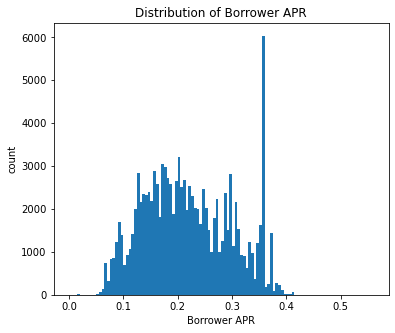

In [21]:
#Univariate Exploration of Borrower APR
bins = np.arange(0, df_loan.BorrowerAPR.max()+0.05, 0.005)
plt.figure(figsize=[6, 5])
plt.hist(data = df_loan, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR')
plt.ylabel('count')
plt.title('Distribution of Borrower APR');

- Observation: The BorrowerAPR has a multimodal distribution with maximum peak between 0.34 and 0.36

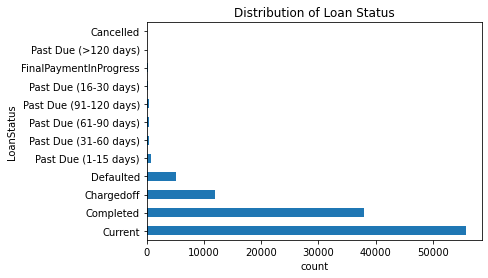

In [22]:
#Univariate Exploration of Loan Status
df_loan['LoanStatus'].value_counts().plot(kind='barh')
plt.ylabel('LoanStatus')
plt.xlabel('count')
plt.title('Distribution of Loan Status');

- Significant Observations: About 5000 loans have been defaulted, There are over 50000 still running.

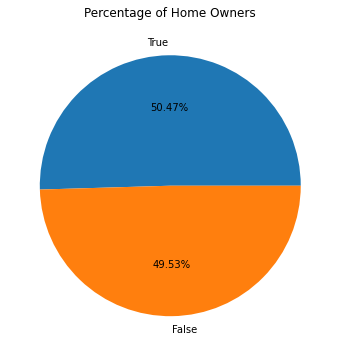

In [23]:
#Univariate Exploration of IsBorrowerHomeOwner
df_loan['IsBorrowerHomeowner'].value_counts().plot(kind='pie', autopct='%1.2f%%',figsize=(6,6), label = '')
plt.title('Percentage of Home Owners');

- Observations: There is an almost equal percentage of Home owners ad non home owners amongst the borrowers. Although Home owners are more.

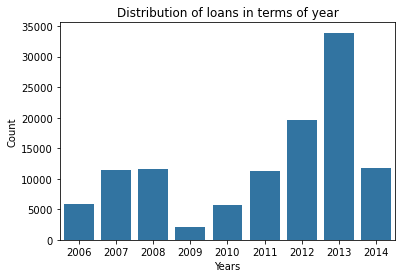

In [24]:
##Univariate Exploration of  loan Origination Year
sb.countplot(data=df_loan, x='LoanOriginationYear', color = base_color)
plt.title('Distribution of loans in terms of year')
plt.xlabel('Years')
plt.ylabel('Count')
plt.show()

- Observation: 2013 had the highest number of loans and 2009 with the lowest number.

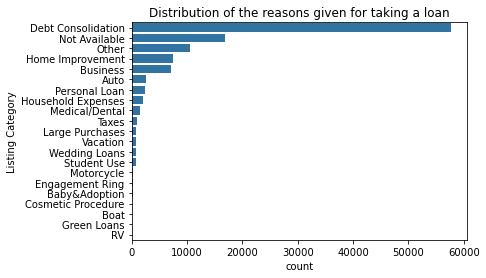

In [25]:
#Univariate Exploration of Listing category
y_order=df_loan['ListingCategory'].value_counts().index
sb.countplot(data=df_loan,y='ListingCategory',color=base_color, order= y_order);
plt.ylabel('Listing Category')
plt.title('Distribution of the reasons given for taking a loan');

- Observation: People took loans for various reason but Debt Consolidation is the top most reason given for taking a loan.

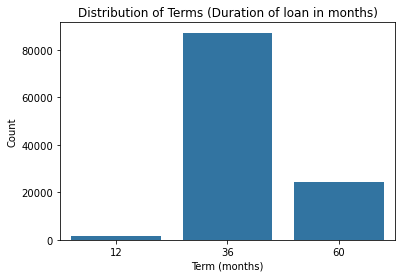

In [26]:
#Univariate Exploration of Term
sb.countplot(data=df_loan,x='Term',color=base_color)
plt.xlabel('Term (months)')
plt.ylabel('Count')
plt.title('Distribution of Terms (Duration of loan in months)')
plt.show()

- Observation: Most of the loans usually run for 36 months

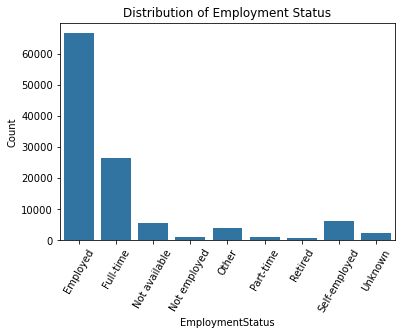

In [27]:
# Univariate Exploration of Employment Status
sb.countplot(data=df_loan,x='EmploymentStatus',color=base_color)
plt.xlabel('EmploymentStatus')
plt.ylabel('Count')
plt.title('Distribution of Employment Status')
plt.xticks(rotation=60);
plt.show()

- Observation: There are alot of Employed people in the Data set

# Bivariate Exploration

## Does Loan Year affects the borrower’s APR ?

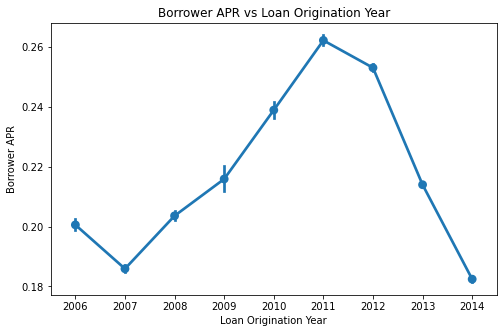

In [28]:
# BorrowerAPR VS Loan Origination Year
fig = plt.figure(figsize=(8,5))
sb.pointplot(data=df_loan, x='LoanOriginationYear', y='BorrowerAPR');
plt.xlabel('Loan Origination Year');
plt.ylabel('Borrower APR');
plt.title('Borrower APR vs Loan Origination Year');


- Observation: There was a significant sharp decline of Borrower APR from the Year 2011-2014 but its still seems like a random distribution as the relationship went from positive to negative over the same number of years. 

## Does Being a home owner affects the status of the loan?

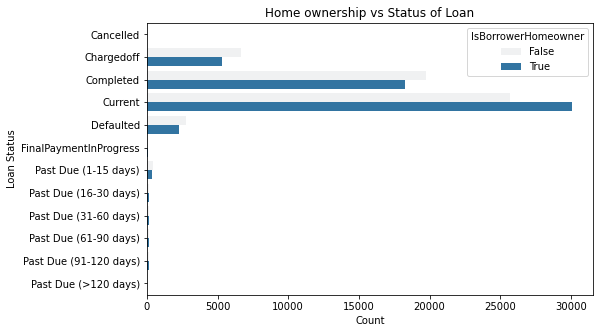

In [29]:
#Relationship between IsBorrowerHomeowner and LoanStatus
fig = plt.figure(figsize=(8,5))
sb.countplot(data=df_loan,hue='IsBorrowerHomeowner',y='LoanStatus',color=base_color);
plt.xlabel('Count');
plt.ylabel('Loan Status');
plt.title('Home ownership vs Status of Loan');

- Observation: Even though there is an almost equal number of home owners and non home owners in our data, The number of non home owners that have completed their loan is more that home owners, Also more home owners still have their loans running.

## Does Stated Monthly Income affects the Loan Original Amount ?

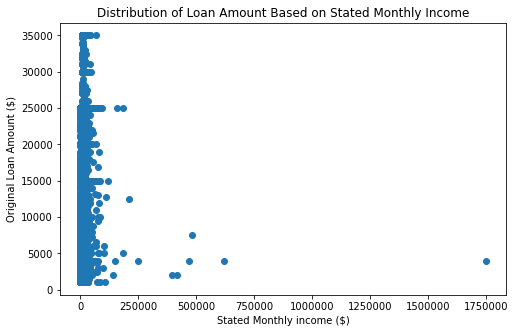

In [30]:
#StatedMonthlyIncome vs LoanOriginalamount
fig = plt.figure(figsize=(8,5))
plt.scatter(data = df_loan, x = 'StatedMonthlyIncome', y= 'LoanOriginalAmount')
plt.title('Distribution of Loan Amount Based on Stated Monthly Income')
plt.xlabel('Stated Monthly income ($)')
plt.ylabel('Original Loan Amount ($)')
plt.ticklabel_format(useOffset=False, style='plain', axis = 'x')
plt.show()

- Observation: The Stated Monthly income does not have an effect on the Original loan amount,no relationship.

## Does Employment Status determine the term of the loan?

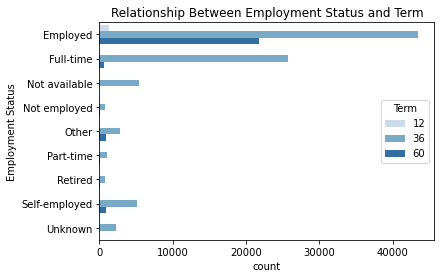

In [31]:
#Relationship Between Employment Status and Term
sb.countplot(data = df_loan, y = 'EmploymentStatus', hue = 'Term', palette = 'Blues');
plt.xlabel('count')
plt.ylabel('Employment Status')
plt.title('Relationship Between Employment Status and Term');


- Observation: Because the employment status data is imbalanced and has more counts of the Employed as seen in the univariate distribution of Employment Status seen earlier. This interaction with term seems to be imbalanced as well. 

## Is there a relationship between the Borrower APR and Loan Original Amount?

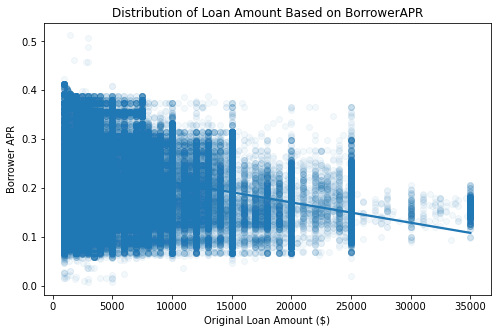

In [32]:
#Relationship between Borrower apr and Original Loan Amount
fig = plt.figure(figsize=(8,5))
sb.regplot(data = df_loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.05})
plt.title('Distribution of Loan Amount Based on BorrowerAPR')
plt.ylabel('Borrower APR')
plt.xlabel('Original Loan Amount ($)')
plt.show()

 - Observation: The borrower APR is negatively correlated with loan amount

## Has the Loan Amounts given increased over the years ?

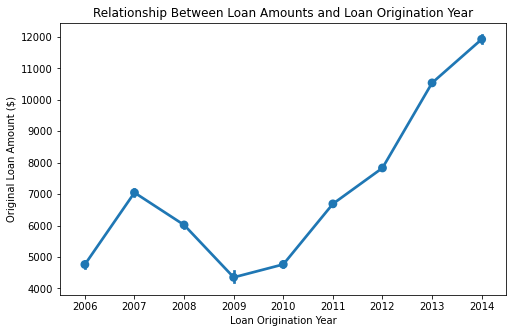

In [33]:
fig = plt.figure(figsize=(8,5))
sb.pointplot(data=df_loan,x='LoanOriginationYear', y='LoanOriginalAmount')
plt.title('Relationship Between Loan Amounts and Loan Origination Year')
plt.ylabel('Original Loan Amount ($)')
plt.xlabel('Loan Origination Year')
plt.show()

- Observation: Loan Amount had a steady decline from 2007-2009 but from 2010 there was a steady increase in the Original loan amount. More of a positive relationship.

## What is the relationship between the Loan Status and the Borrower's APR?

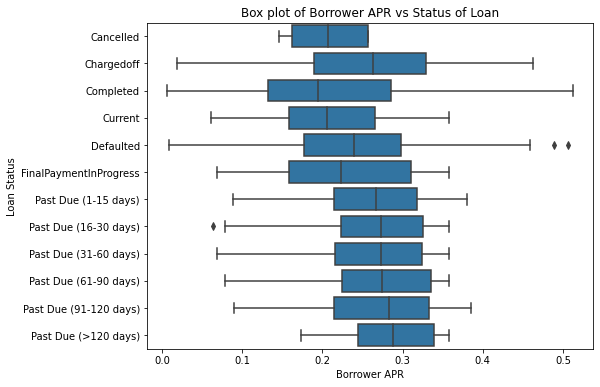

In [34]:
# Borrower APR vs Status of Loan and 
fig = plt.figure(figsize=(8,6))
sb.boxplot(data=df_loan,x='BorrowerAPR',y='LoanStatus',color=base_color);
plt.xlabel('Borrower APR');
plt.ylabel('Loan Status');
plt.title('Box plot of Borrower APR vs Status of Loan');

- Observation: Completed, Current, and Final Payment in progress are top 3 Loan Status(based on the 1st quartile) with the lowest BorrowerARP.

## What is the relationship between the Employment Status and the Borrower's APR?

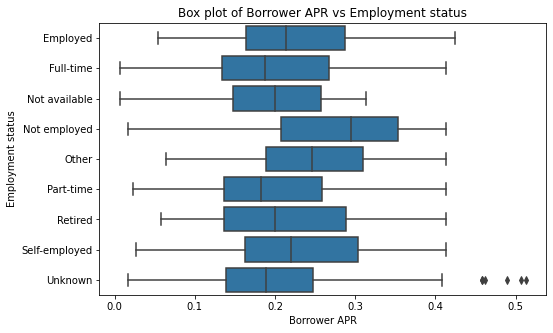

In [35]:
 #Borrower APR vs Employment status
fig = plt.figure(figsize=(8,5))
sb.boxplot(data=df_loan,x='BorrowerAPR',y='EmploymentStatus',color=base_color);
plt.xlabel('Borrower APR');
plt.ylabel('Employment status');
plt.title('Box plot of Borrower APR vs Employment status');

- Observation: There is little to no relationship between the Employment status and the Borrower APR.

## What is the relationship between the Duration of loan(Term) and the Borrower's APR

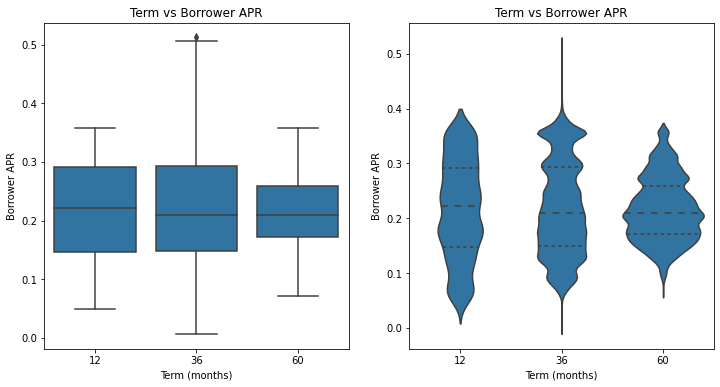

In [36]:
plt.figure(figsize=(12,6))
# Plotting boxplot.
plt.subplot(1,2,1)
sb.boxplot(x='Term',y='BorrowerAPR',data=df_loan,color=base_color)
plt.xlabel('Term (months)')
plt.ylabel('Borrower APR')
plt.title('Term vs Borrower APR')
# Plotting violinplot.
plt.subplot(1,2,2)
sb.violinplot(x='Term',y='BorrowerAPR',data=df_loan,color=base_color,inner='quartile')
plt.xlabel('Term (months)')
plt.ylabel('Borrower APR')
plt.title('Term vs Borrower APR');

- Observation: The distribution of APR for the 12 months term is fairly normal, there is an almost equal mean for all the three terms, the 36 month term has both the maximum and minimum APR.

In [37]:
#Viewing Details of the Min Borrower Apr for better understanding
idx=df_loan.BorrowerAPR.idxmin()
df_loan.loc[idx]

Term                                        36
LoanStatus                           Completed
BorrowerAPR                            0.00653
BorrowerRate                               0.0
LenderYield                              -0.01
BorrowerState                               MI
Occupation             Food Service Management
EmploymentStatus                     Full-time
IsBorrowerHomeowner                      False
StatedMonthlyIncome                1833.333333
LoanOriginalAmount                        3000
LoanOriginationDate        2007-03-27 00:00:00
MonthlyLoanPayment                       83.33
Investors                                    2
LoanOriginationYear                       2007
ListingCategory                  Not Available
Name: 76858, dtype: object

In [38]:
#Viewing Details of the Max Borrower Apr for better understanding
idx=df_loan.BorrowerAPR.idxmax()
df_loan.loc[idx]

Term                                    36
LoanStatus                       Completed
BorrowerAPR                        0.51229
BorrowerRate                        0.4975
LenderYield                         0.4925
BorrowerState                      Unknown
Occupation                         Unknown
EmploymentStatus                   Unknown
IsBorrowerHomeowner                  False
StatedMonthlyIncome                 2838.0
LoanOriginalAmount                    1500
LoanOriginationDate    2006-02-27 00:00:00
MonthlyLoanPayment                   80.94
Investors                                9
LoanOriginationYear                   2006
ListingCategory              Not Available
Name: 36018, dtype: object

# Multivariate Exploration

## What is the effect of the duration of loan(Term) on the relationship between Borrower's APR and the Original loan amount?

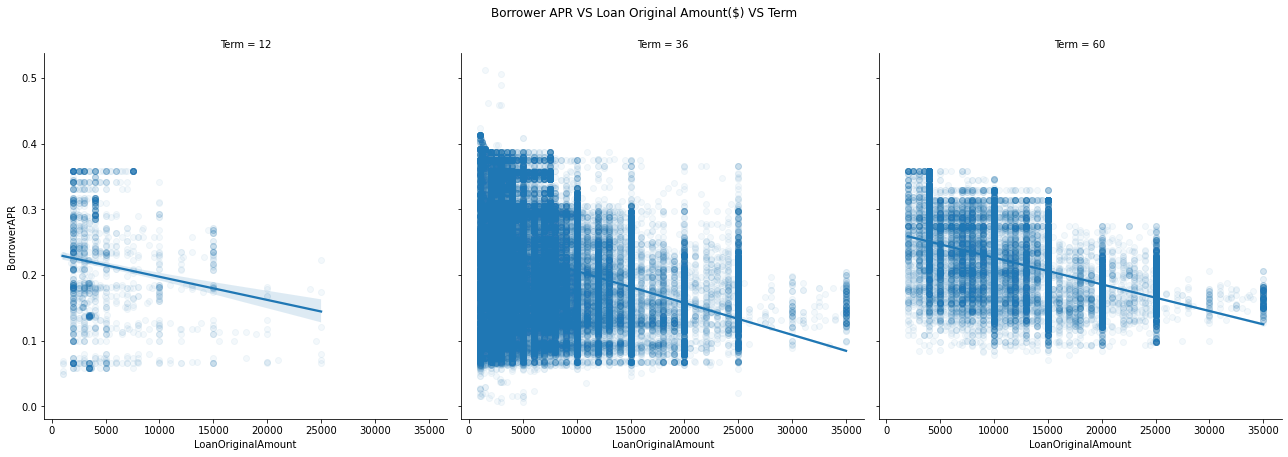

In [39]:
# Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data=df_loan, aspect=1, height=6, col='Term')
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04,scatter_kws={'alpha':0.05})
g.fig.suptitle('Borrower APR VS Loan Original Amount($) VS Term', y= 1.05);

- Observation: Term seems to have no effect on the relationship between Original Loan Amount and Borrower APR

## What is the effect of the duration of loan(Term) on the relationship between borrower's APR and Employment Status

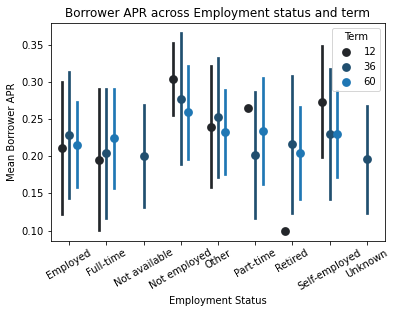

In [40]:
ax = sb.pointplot(data = df_loan, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'Term', color= base_color, linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across Employment status and term')
plt.xlabel('Employment Status')
plt.ylabel('Mean Borrower APR');
plt.xticks(rotation=30);

- Observation: For the employed the Borrower APR reduces as term increases, for the remaining employment status there is no consistenT relationship between the borrower APR and the term. It is quite random.

## Does being an Home owner have effect on relationship between borrower's APR and Term?

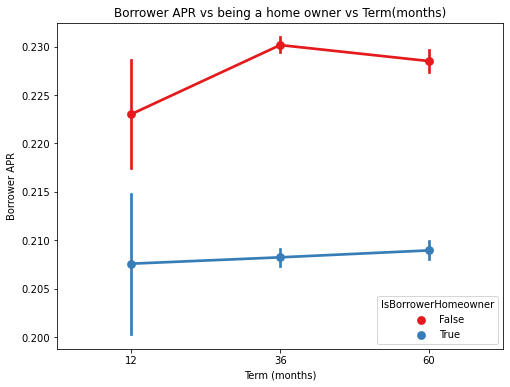

In [41]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(x="Term", y="BorrowerAPR", hue="IsBorrowerHomeowner",data=df_loan, palette="Set1")
plt.ylabel('Borrower APR')
plt.xlabel('Term (months)')
plt.title('Borrower APR vs being a home owner vs Term(months)');


- Observation: The borrower APR increased for none home owners borrowing for the 36 month Term. While those who own a home have a consistent Borrower APR across all terms.

# Conclusion
> From this Analysis we can say that 
-  Most of the Borrowers in this data still have their loans running and are running for a duration of 36months.
-  The loans taken in the year 2013 is rather high compared to other years in the distribution.
-  Suprisingly there is no significant relationship between the borrower's APR and these variables: Loan year, Employment Status of the borrower, the Loan amount given to the borrower.
-  There is a negative correlation between the loan Amount and the Borrowers APR and the Duration of the the loan did not have an effect on it.
-  Borrowers who do not own a home tend to have a higher borrower's APR when compared to borrowers who owns a home.

> Overall, from the Subset chosen for this analysis Only the Borrower owning a home showed a significant relationship when used on the relationship between the Borrowers APR and the Tenure . Hence not owning a home as a borrower will lead to an increase in your APR across the Terms. 